# Predicting the Class of Car

#### Here, class is calculated using K - Nearest Neighbour Technique performed on data collected from UCI.


NOTE - 'class': 'unacc': '1', 'acc': '2', 'good': '3', 'vgood': '4'

In [1]:
# Importing dependencies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools
%matplotlib inline

## Loading data

In [2]:
df = pd.read_csv("New_data_cardst.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1


In [3]:
df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

dividing

## Dividing data

In [4]:
X = df[['buying', 'maint','doors', 'persons', 'lug_boot', 'safety']].values
X[0:5]

array([[4, 4, 2, 2, 1, 2],
       [4, 4, 2, 2, 1, 3],
       [4, 4, 2, 2, 2, 1],
       [4, 4, 2, 2, 2, 2],
       [4, 4, 2, 2, 2, 3]], dtype=int64)

In [5]:
y = df['class'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalizing data

In [6]:
# Importing library

from sklearn import preprocessing

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.33738465e+00, -1.22563179e+00, -7.09277656e-04],
       [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.33738465e+00, -1.22563179e+00,  1.22421323e+00],
       [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.33738465e+00, -7.09277656e-04, -1.22563179e+00],
       [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.33738465e+00, -7.09277656e-04, -7.09277656e-04],
       [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.33738465e+00, -7.09277656e-04,  1.22421323e+00]])

## Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1381, 6) (1381,)
Test set: (346, 6) (346,)


## Classification KNN

In [9]:
# Importing library

from sklearn.neighbors import KNeighborsClassifier

In [10]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

## Prediction

In [11]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 1, 1, 1], dtype=int64)

## Accuracy Evaluation

In [12]:
from sklearn import metrics

# For 'TRAIN-SET' print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.9393063583815029


### For different values of 'k'

In [13]:
# Values of 'k' ranging from 1-9

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9566474 , 0.92774566, 0.95953757, 0.93930636, 0.97687861,
       0.96242775, 0.96242775, 0.95086705, 0.96820809])

### Plotting

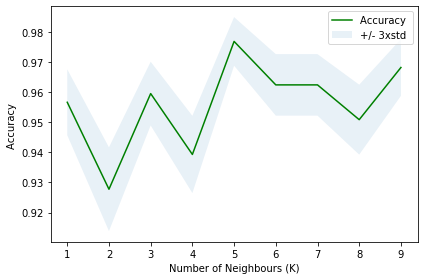

In [14]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [15]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.976878612716763 with k = 5


## Evaluation using best value of 'k'

In [16]:
k = 5
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat5 = neigh5.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat5))


Test set Accuracy:  0.976878612716763


In [17]:
yhat5

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 4, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 4, 1, 4, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 3, 1, 1, 2, 4, 4, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 4, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,

## Model Evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, yhat5))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       241
           2       0.96      0.95      0.96        81
           3       1.00      0.73      0.85        15
           4       0.90      1.00      0.95         9

    accuracy                           0.98       346
   macro avg       0.96      0.92      0.94       346
weighted avg       0.98      0.98      0.98       346



In [22]:
print(confusion_matrix(y_test, yhat5))

[[241   0   0   0]
 [  4  77   0   0]
 [  0   3  11   1]
 [  0   0   0   9]]


In [23]:
import itertools

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[241   0   0   0]
 [  4  77   0   0]
 [  0   3  11   1]
 [  0   0   0   9]]


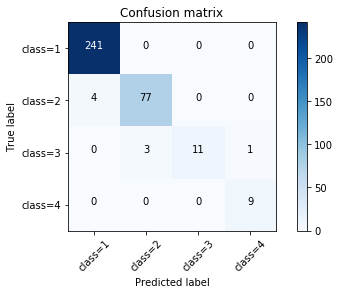

In [25]:
cnf_matrix = confusion_matrix(y_test, yhat5, labels=[1,2,3,4])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=2','class=3','class=4'],normalize= False,  title='Confusion matrix')